### Using Python version 3.6 and Tensorflow version 1.7

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
tf.set_random_seed(1)

/Users/meenakshiparyani/anaconda/envs/py36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### 1. (10pts) Define functions

In [2]:
# One hot encode the labels
def one_hot_encode(y):
    targets = np.array(np.unique(y)).reshape(-1)
    enc = np.eye(len(targets))[y]
    return enc

#Get the accuracy of the results
def get_accuracy(y, y_pred):
    y = tf.nn.softmax(y)
    y_pred = tf.nn.softmax(y_pred)
    labels_equal = tf.equal(y, y_pred)
    accuracy = tf.reduce_mean(tf.cast(labels_equal, 'float'))
    return accuracy

# Get the cost of iteration
def get_cost(y, y_pred):
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y_pred, labels=y))
    return cost

def extract_parameters(a_prev, hyper_params, key):
    hyper_param = hyper_params[key]
    pad = hyper_param["pad"]
    f = hyper_param["f"]
    stride = hyper_param["stride"]
    filters = hyper_param["channels"]
    #a_prev = tf.pad(a_prev, [[0, 0], [pad, pad], [pad, pad], [0, 0]], "CONSTANT")
    return pad, f, stride, filters, a_prev

# Flatten the array
def flatten(A):
    return tf.layers.flatten(A)

# Forward propagation to calculate yHat
def forward_propagate_lenet5(x, hyper_params):

    # Layer 1 Convolution 
    pad_c1, f_c1, stride_c1, filters_out_c1, padded_c1_in =  extract_parameters(x, hyper_params, "c1")
    a1_c = tf.layers.conv2d(inputs = padded_c1_in, filters=filters_out_c1, kernel_size=[f_c1,f_c1],
    strides=(stride_c1, stride_c1), padding='same', dilation_rate=(1, 1),activation=tf.nn.relu) # Relu Activation
    
    print(a1_c)
    
    # Layer 1 Pooling 
    pad_p1, f_p1, stride_p1, filters_out_p1, padded_p1_in =  extract_parameters(a1_c, hyper_params, "p1")
    print(f_p1)
    a1_p = tf.layers.max_pooling2d(inputs = padded_p1_in,pool_size=[f_p1,f_p1], strides=1,
                                                    padding='same') #TODO: change padding
    print(a1_p)
 
    # Layer 2 Convolution 
    pad_c2, f_c2, stride_c2, filters_out_c2, padded_c2_in =  extract_parameters(a1_p, hyper_params, "c2")
    a2_c = tf.layers.conv2d(inputs = padded_c2_in, filters=filters_out_c2, kernel_size=[f_c2,f_c2],
                                            strides=(stride_c2, stride_c2), padding='same' , activation=tf.nn.relu) # Relu Activation
    print(a2_c)
    # Layer 2 Pooling 
    pad_p2, f_p2, stride_p2, filters_out_p2, padded_p2_in =  extract_parameters(a2_c, hyper_params, "p2")
    a2_p = tf.layers.average_pooling2d(inputs = padded_p2_in, pool_size=[f_p2,f_p2], strides=1,
                                                    padding='same')
    
    print(a2_p)
    # Flatten the array
    a3 = flatten(a2_p)
    print(a3)
    

    # Fully Connected Layer 4
    fc1_size = hyper_params["4"]["size"]
    #he_init = tf.layers.variance_scaling_initializer()
    random_init = tf.random_uniform_initializer()
    a4 = tf.layers.dense(inputs = a3, units=fc1_size, activation=tf.nn.relu, kernel_initializer=random_init)
    print(a4)
    
    # Fully Connected Layer 5
    fc2_size = hyper_params["5"]["size"]
    #xavier_init = tf.contrib.layers.variance_scaling_initializer()
    random_init = tf.random_uniform_initializer()
    a5 = tf.layers.dense(inputs = a4, units=fc2_size, activation=tf.nn.sigmoid, kernel_initializer=random_init)
    print(a5)
    return a5

### 2. Load data

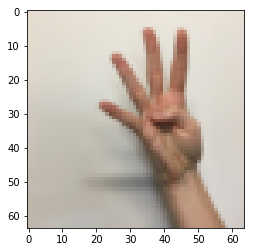

Digit in the image is 4


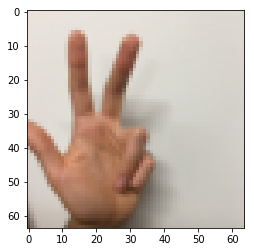

Digit in the image is 3
(180, 64, 64, 3)


In [3]:
# Load Training Data
X_train = np.load('exam2_train_x.npy')
y_train = np.load('exam2_train_y.npy')
indx = 2
plt.imshow(X_train[indx])
plt.show()
print("Digit in the image is " + str(y_train[indx]))

# Normalize the training data
X_train_norm = (X_train/255.0) - 0.5
y_train_encoded = one_hot_encode(y_train)

# Load testing Data
X_test = np.load('exam2_test_x.npy')
y_test = np.load('exam2_test_y.npy')
indx = 2
plt.imshow(X_test[indx])
plt.show()
print("Digit in the image is " + str(y_test[indx]))

# Normalize the test data
X_test_norm = (X_test/255.0) - 0.5
y_test_encoded = one_hot_encode(y_test)
print(X_test.shape)

### 3. (10pts) Initialize parameters (Weights, bias for each layer)

In [4]:
def initialize_hyper_params():
    
    hyper_params = {}
    
    # Convolution Layer 1 Hyper Parameters
    hyper_params_c1 = {}
    hyper_params_c1["stride"] = 2
    hyper_params_c1["pad"] = 1
    hyper_params_c1["f"] = 4
    hyper_params_c1["channels"] = 8
    
    # Pooling Layer 1 Hyper Parameters
    hyper_params_p1 = {}
    hyper_params_p1["stride"] = 1
    hyper_params_p1["pad"] = 0
    hyper_params_p1["f"] = 5
    hyper_params_p1["channels"] = 8
    
    # Convolution Layer 2 Hyper Parameters
    hyper_params_c2 = {}
    hyper_params_c2["stride"] = 2
    hyper_params_c2["pad"] = 0
    hyper_params_c2["f"] = 4
    hyper_params_c2["channels"] = 16
    
    # Pooling Layer 2 Hyper Parameters
    hyper_params_p2 = {}
    hyper_params_p2["stride"] = 1
    hyper_params_p2["pad"] = 0
    hyper_params_p2["f"] = 5
    hyper_params_p2["channels"] = 16
    
    hyper_params_4 = {}
    hyper_params_4["size"] = 108
            
    hyper_params_5 = {}
    hyper_params_5["size"] = 6
    
    hyper_params["c1"] = hyper_params_c1
    hyper_params["p1"] = hyper_params_p1
    
    hyper_params["c2"] = hyper_params_c2
    hyper_params["p2"] = hyper_params_p2
    
    hyper_params["4"] = hyper_params_4
    hyper_params["5"] = hyper_params_5
    
    return hyper_params

In [ ]:
hyper_params = initialize_hyper_params()
y_pred = forward_propagate_lenet5(X_train_norm, hyper_params)

### 4. (40pts) Build Convolution Neural Network model

In [5]:
# epochs = 1000
# X_train = X_train_norm
# y_train = y_train_encoded
# X_test =  X_test_norm, y_test, learning_rate, keep_prob=0.8
def train_cnn_lenet5(epochs, X_train, y_train, X_test, y_test, learning_rate, keep_prob=0.8):
    tf.reset_default_graph()
    (m, nH, nW, nC) = X_train.shape
    x = tf.placeholder(tf.float32, [None, nH, nW, nC])
    print(x.shape)
    print(X_test.shape)
    y = tf.placeholder(tf.float32)
    hyper_params = initialize_hyper_params()
    y_pred = forward_propagate_lenet5(x, hyper_params)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y_pred, labels=y))
    
    # The AdamOptimizer is used to optimize the cost
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    init = tf.global_variables_initializer()
    correctness = tf.equal(tf.argmax(y_pred,1), tf.argmax(y,1)) # Softmax Predictions
    accuracy = tf.reduce_mean(tf.cast(correctness, 'float'))
    cost_history = []
    max_test_acc = 0
    max_iter = 0
    train_acc = 0
    test_acc = 0
    
    with tf.Session() as sess:
        sess.run(init)
        for epoch in range(epochs+1):
            temp, epoch_cost = sess.run([optimizer, cost], feed_dict={x:X_train, y:y_train})
            cost_history.append(epoch_cost)
            if(epoch % 1 == 0):
                train_acc = accuracy.eval({x:X_train, y:y_train})
#                 test_acc = accuracy.eval({x:X_test, y:y_test}) 
#                 if(test_acc > max_test_acc):
#                     max_test_acc = test_acc
#                     print('Max till now is ' , max_test_acc)
#                     max_iter = epoch
#                 print('Accuracy Test: ' + str(test_acc) + ' on iteration ' + str(epoch))
                print('Cost is {} for interation:{} and train accuracy:{}'.format(epoch_cost, epoch, train_acc))
        plotCostHistory(cost_history)
        train_acc = train_acc * 100.0
        test_acc = test_acc * 100.0
        print('Train Accuracy: ', train_acc)
        print('Test Accuracy: ' ,test_acc)
        print('Max Test Accuracy: ' + str(max_test_acc* 100.0) + ' on iteration ' + str(max_iter))
        return train_acc, test_acc

### 5. (20pts) Optimization of Convolution Neural Network model

In [6]:
train_cnn_lenet5(1000, X_train_norm, y_train_encoded, X_test_norm, y_test_encoded, learning_rate=100)

(?, 64, 64, 3)
(180, 64, 64, 3)
Tensor("conv2d/Relu:0", shape=(?, 32, 32, 8), dtype=float32)
5
Tensor("max_pooling2d/MaxPool:0", shape=(?, 32, 32, 8), dtype=float32)
Tensor("conv2d_1/Relu:0", shape=(?, 16, 16, 16), dtype=float32)
Tensor("average_pooling2d/AvgPool:0", shape=(?, 16, 16, 16), dtype=float32)
Tensor("flatten/Reshape:0", shape=(?, 4096), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 108), dtype=float32)
Tensor("dense_1/Sigmoid:0", shape=(?, 6), dtype=float32)
Cost is 1.791762113571167 for interation:0 and train accuracy:0.16470588743686676
Cost is 1.791762113571167 for interation:1 and train accuracy:0.16470588743686676
Cost is 1.791762113571167 for interation:2 and train accuracy:0.16470588743686676
Cost is 1.791762113571167 for interation:3 and train accuracy:0.16470588743686676


KeyboardInterrupt: 

### 5. (20pts) Predictions